<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/LLMsGenAI/StableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hf_xet # ajuda carregar os modelos fora do ambiente do google colab

In [ ]:
from diffusers import StableDiffusionXLPipeline # é a biblioteca que vai ordenar e executar todas as etapas até a geração da imagem
import torch # biblioteca clássica de deep learning
import matplotlib.pyplot as plt # biblioteca clássica de visualização de dados

In [ ]:
# definir os parametros do pipeline (modelo, prompt, prompt negativo, etc)
# modelo
pretrained_model = "stabilityai/stable-diffusion-xl-base-1.0" # boa performance e compatibilidade

# prompt (recomendado testar em ingles)
prompt = "a colorful vibrant city street, daylight, a red car parked by the sidewalk"

# prompt negativo (o que não queremos)
negative_prompt = "blurry, low quality, grayscale, monochrome, dull, dark"

# números de inferencias = o stable diffusion cria imagens por etapas e vai melhorando a cada uma
# quanto mais etapas, mais demora e menos melhora
num_inference_steps = 50

# controla a criatividade do modelo (como a temperatura do modelo de linguagem)
# acima de 8 tende a seguir exatamente o que o prompt pede
guidence_scale = 7.5

# altura e largura (espera-se que seja multiplo de 64)
height = 768
width = 768

# seed (repetir o mesmo resultado)
seed = 42

In [ ]:
# manual seed do torch
generator = torch.manual_seed(seed)

# criar o objeto pipeline
pipeline = StableDiffusionXLPipeline.from_pretrained(
    pretrained_model,
    torch_dtype=torch.float16, # formato
    use_safetensors=True # como se fossem matrizes que armazenam os pesos do processo
  ).to("cuda")

In [ ]:
# executar o objeto pipeline
image = pipeline( # nome do pipeline que criamos anteriormente
    prompt = prompt,
    negative_prompt = negative_prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidence_scale,
    height = height,
    width = width,
    generator = generator,
).images[0] # images[0] pra gerar apenas uma imagem

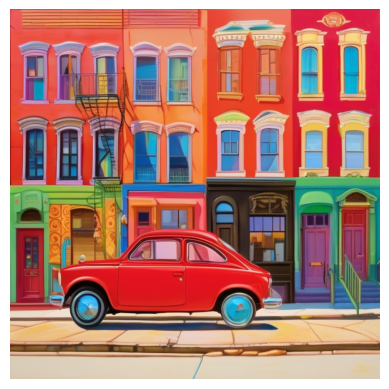

In [ ]:
# visualizar a imagem
plt.imshow(image)
plt.axis("off") # remover pra imagem não ficar parecendo grafico
plt.show()